In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df = pd.read_csv('/kaggle/input/stock-market-dataset/symbols_valid_meta.csv')
df.head()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [163]:
d = df[(df['Nasdaq Traded'].astype('str')=='Y') & (df['Symbol'].astype('str').str.startswith('NV'))]

In [164]:
d[d['Symbol']=='NVDA']

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
5160,Y,NVDA,NVIDIA Corporation - Common Stock,Q,Q,N,100.0,N,N,NaN,NVDA,N


In [165]:
df1 =  pd.read_csv('/kaggle/input/stock-market-dataset/stocks/NVDA.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.533965,6109200.0
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.529172,5688000.0


In [166]:
df1.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [167]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
df1[columns] = df1[columns].fillna(df1[columns].mean())

In [168]:
df1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [169]:
df1 = df1.drop_duplicates(inplace=False)

In [170]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.533965,6109200.0
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.529172,5688000.0


In [171]:
df1['year'] = pd.to_datetime(df1['Date']).dt.year
df1.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0,1999
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0,1999
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0,1999


In [172]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']

skewness_values = df1[columns].skew()

def classify_skewness(skewness):
    if -0.5 <= skewness <= 0.5:
        return "symmetrical"
    elif skewness < -0.5:
        return "left-skewed"
    elif skewness > 0.5:
        return "right-skewed"
    else:
        return "undefined"

for column, skewness in skewness_values.items():
    skew_type = classify_skewness(skewness)
    print(f"Skewness for '{column}' column: {skewness:.4f} ({skew_type})")

Skewness for 'Open' column: 2.1478 (right-skewed)
Skewness for 'High' column: 2.1481 (right-skewed)
Skewness for 'Low' column: 2.1493 (right-skewed)
Skewness for 'Close' column: 2.1487 (right-skewed)
Skewness for 'Adj Close' column: 2.1519 (right-skewed)


In [173]:
df1[columns] = np.log(df1[columns])
skewness_values = df1[columns].skew()
for column, skewness in skewness_values.items():
    skew_type = classify_skewness(skewness)
    print(f"Skewness for '{column}' column: {skewness:.4f} ({skew_type})")

Skewness for 'Open' column: 0.6373 (right-skewed)
Skewness for 'High' column: 0.6430 (right-skewed)
Skewness for 'Low' column: 0.6278 (right-skewed)
Skewness for 'Close' column: 0.6346 (right-skewed)
Skewness for 'Adj Close' column: 0.6604 (right-skewed)


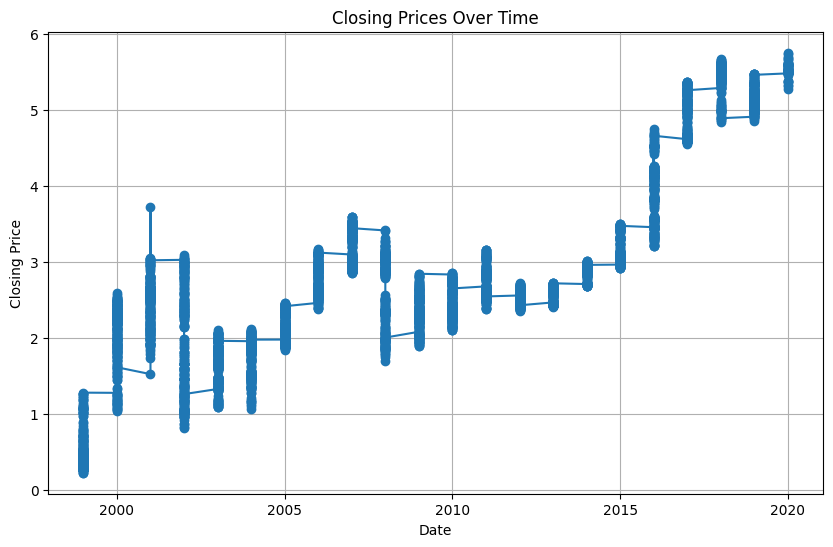

In [174]:
# Line Plot to identify trends
plt.figure(figsize=(10, 6))
plt.plot(df1['year'], df1['Adj Close'], marker='o')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [175]:
#!pip install mplfinance

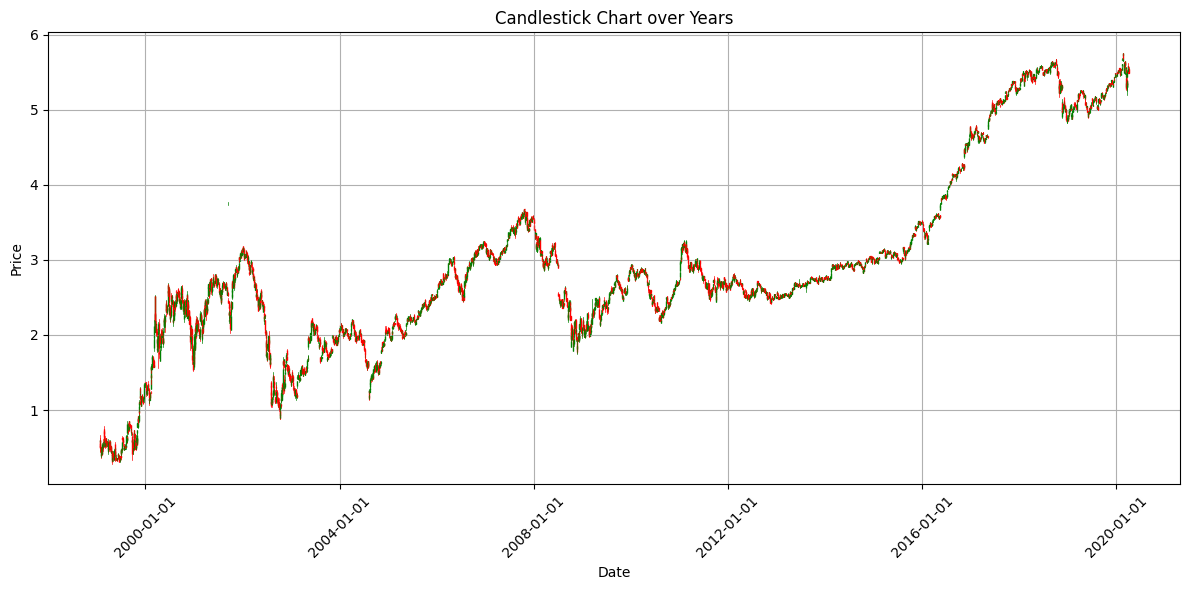

In [176]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date_num'] = mdates.date2num(df1['Date'])

ohlc_data = df1[['Date_num', 'Open', 'High', 'Low', 'Close']].copy()

fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc_data.values, width=0.6, colorup='g', colordown='r')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Candlestick Chart over Years')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [177]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,Date_num
0,1999-01-22,0.559616,0.669431,0.439598,0.495077,0.412108,67867200.0,1999,10613.0
1,1999-01-25,0.571450,0.606136,0.495077,0.594707,0.511738,12762000.0,1999,10616.0
2,1999-01-26,0.606136,0.625827,0.498247,0.513946,0.430976,8580000.0,1999,10617.0
3,1999-01-27,0.517056,0.541597,0.459532,0.510826,0.427856,6109200.0,1999,10618.0
4,1999-01-28,0.510826,0.517056,0.501406,0.507696,0.424726,5688000.0,1999,10619.0


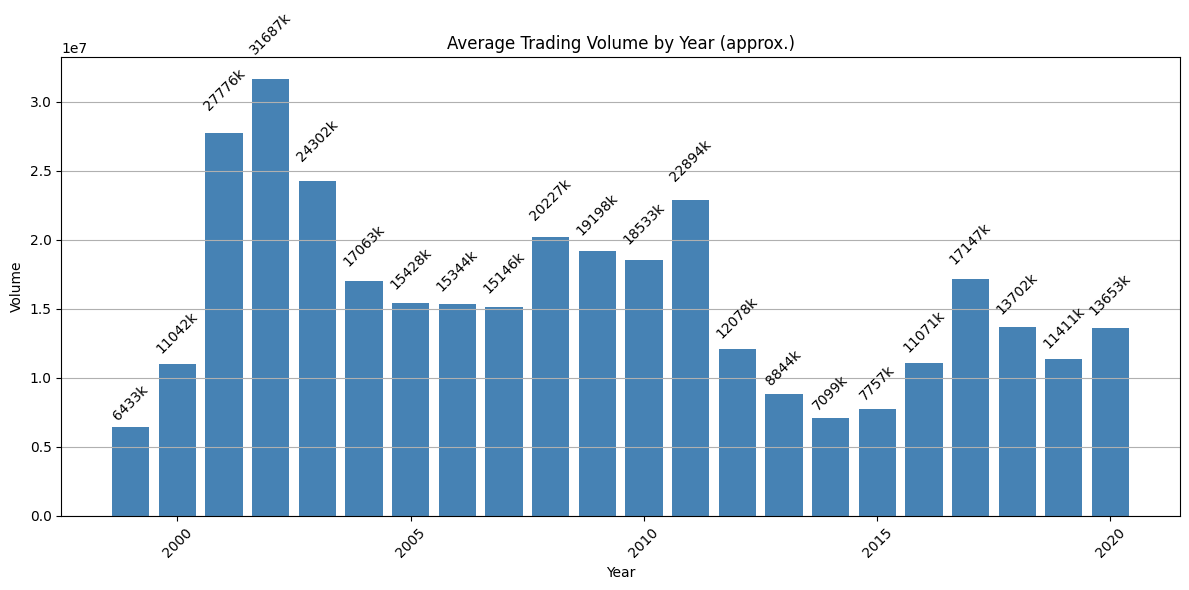

In [178]:
average_volume_by_year = df1.groupby('year')['Volume'].mean().reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(average_volume_by_year['year'], average_volume_by_year['Volume'], color='steelblue')

def format_number(x):
    return f'{x/1e3:.0f}k'

# Adding average volume
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.05,  # Offset for text to be above the bar
             format_number(yval),  # Format the volume value
             ha='center', va='bottom', fontsize=10, rotation=45)

plt.title('Average Trading Volume by Year (approx.)')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.grid(True, axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [179]:
#!pip install plotly

In [180]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,Date_num
0,1999-01-22,0.559616,0.669431,0.439598,0.495077,0.412108,67867200.0,1999,10613.0
1,1999-01-25,0.571450,0.606136,0.495077,0.594707,0.511738,12762000.0,1999,10616.0
2,1999-01-26,0.606136,0.625827,0.498247,0.513946,0.430976,8580000.0,1999,10617.0
3,1999-01-27,0.517056,0.541597,0.459532,0.510826,0.427856,6109200.0,1999,10618.0
4,1999-01-28,0.510826,0.517056,0.501406,0.507696,0.424726,5688000.0,1999,10619.0


In [181]:
#!pip install statsmodels

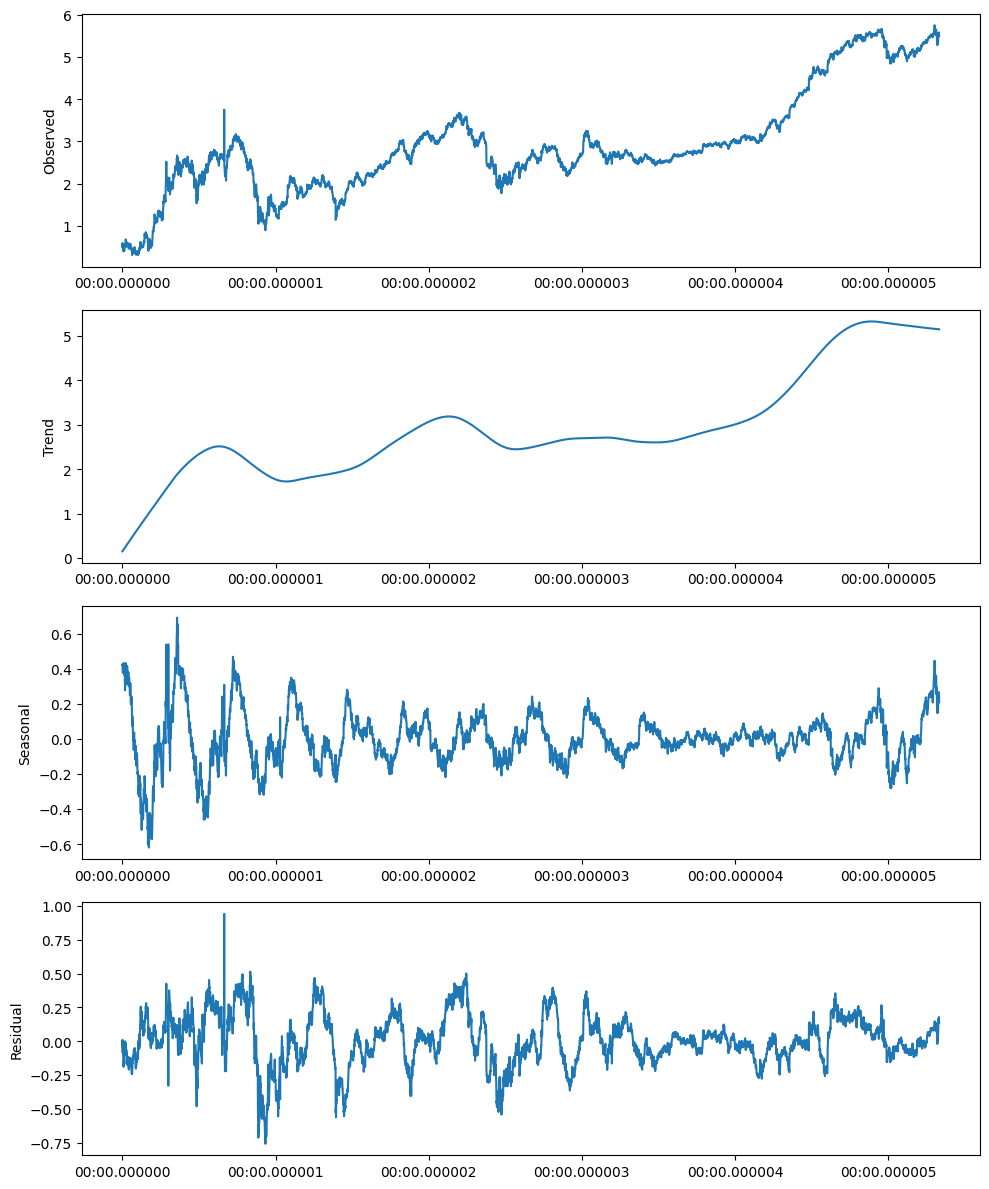

In [185]:
from statsmodels.tsa.seasonal import STL

df1.index = pd.to_datetime(df1.index)

df1.sort_index(inplace=True)

# STL decomposition on the 'Close' price
stl = STL(df1['Close'], period=365)  # Assuming daily data, so period=365 for yearly seasonality
result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

ax1.plot(df1.index, result.observed)
ax1.set_ylabel('Observed')

ax2.plot(df1.index, result.trend)
ax2.set_ylabel('Trend')

ax3.plot(df1.index, result.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(df1.index, result.resid)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [183]:
summary_stats = pd.concat([result.trend.describe(), result.seasonal.describe(), result.resid.describe()], axis=1)
summary_stats.columns = ['Trend', 'Seasonal', 'Residual']
print(summary_stats)

             Trend     Seasonal     Residual
count  5334.000000  5334.000000  5334.000000
mean      2.909975     0.001717     0.008806
std       1.142803     0.147986     0.184860
min       0.152646    -0.618456    -0.758431
25%       2.281761    -0.077667    -0.094484
50%       2.673055    -0.004580     0.003912
75%       3.158806     0.072962     0.118220
max       5.326240     0.690608     0.941216
